In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X=np.loadtxt('ex5Linx.dat')
Y=np.loadtxt('ex5Liny.dat')

In [3]:
XX=np.loadtxt('ex5Linx.dat')
YY=np.loadtxt('ex5Liny.dat')

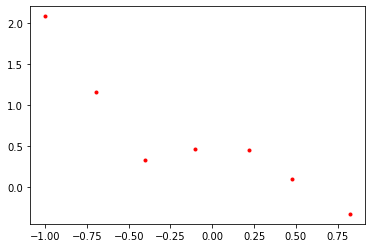

In [4]:
plt.plot(XX,YY,'r.')
plt.show()

In [5]:
X.shape

(7,)

In [6]:
X=X.reshape(X.shape[0],1)

In [7]:
X.shape

(7, 1)

In [8]:
#x0=np.ones([X.shape[0],1])

In [9]:
#X=np.concatenate((x0,X),axis=1)

In [10]:
X

array([[-0.99768],
       [-0.69574],
       [-0.40373],
       [-0.10236],
       [ 0.22024],
       [ 0.47742],
       [ 0.82229]])

In [11]:
X2=X**2

In [12]:
X2

array([[0.99536538],
       [0.48405415],
       [0.16299791],
       [0.01047757],
       [0.04850566],
       [0.22792986],
       [0.67616084]])

In [13]:
X3=X**3

In [14]:
X3

array([[-0.99305613],
       [-0.33677583],
       [-0.06580715],
       [-0.00107248],
       [ 0.01068289],
       [ 0.10881827],
       [ 0.5560003 ]])

In [15]:
X4=X**4

In [16]:
X4

array([[9.90752244e-01],
       [2.34308418e-01],
       [2.65683196e-02],
       [1.09779465e-04],
       [2.35279882e-03],
       [5.19520194e-02],
       [4.57193487e-01]])

In [17]:
X5=X**5

In [18]:
X5

array([[-9.88453699e-01],
       [-1.63017739e-01],
       [-1.07264277e-02],
       [-1.12370260e-05],
       [ 5.18180412e-04],
       [ 2.48029331e-02],
       [ 3.75945633e-01]])

In [19]:
s=2
print(s**2)
print(s**3)
print(s**4)

4
8
16


In [20]:
theta_1=np.zeros(5)
baise_1=0
theta_2=np.zeros(5)
baise_2=0
theta_3=np.zeros(5)
baise_3=0

In [22]:
X=np.concatenate((X,X2,X3,X4,X5),axis=1)

In [23]:
X

array([[-9.97680000e-01,  9.95365382e-01, -9.93056135e-01,
         9.90752244e-01, -9.88453699e-01],
       [-6.95740000e-01,  4.84054148e-01, -3.36775833e-01,
         2.34308418e-01, -1.63017739e-01],
       [-4.03730000e-01,  1.62997913e-01, -6.58071474e-02,
         2.65683196e-02, -1.07264277e-02],
       [-1.02360000e-01,  1.04775696e-02, -1.07248402e-03,
         1.09779465e-04, -1.12370260e-05],
       [ 2.20240000e-01,  4.85056576e-02,  1.06828860e-02,
         2.35279882e-03,  5.18180412e-04],
       [ 4.77420000e-01,  2.27929856e-01,  1.08818272e-01,
         5.19520194e-02,  2.48029331e-02],
       [ 8.22290000e-01,  6.76160844e-01,  5.56000300e-01,
         4.57193487e-01,  3.75945633e-01]])

In [39]:
print(X.shape)
print(theta_1.shape)

(7, 5)
(5,)


In [25]:
def hypothesis(X,theta,baise):
    return ((X.dot(theta.T)+baise))

In [26]:
h=hypothesis(X,theta_1,baise_1)
h

array([0., 0., 0., 0., 0., 0., 0.])

In [40]:
def loss(m,Y,hypo,reg,theta):
    return ((1/2*m)*np.sum((hypo-Y)**2+np.sum((reg*(theta**2)))))

In [56]:
def loss2(m,Y,hypo,reg,theta):
    return ((1/2*m)*np.sum((hypo-Y)**2+(reg)))

In [41]:
m=X.shape[0]


In [42]:
loss(m,Y,h,reg,theta_1)

22.250458477099997

In [30]:
#loss(m,Y,h,0)

In [305]:
#loss(m,Y,h,3)

In [243]:
#loss(m,Y,h,10)

267.25045847710004

In [43]:
def gradient_baise(m,Y,hypo):
    return ((1/m)*np.sum((hypo-Y)))

In [44]:
gb=gradient_baise(m,Y,h)
lr=0.001
gb

-0.60866

In [45]:
#baise=baise-lr*gb

In [46]:
#baise

In [49]:
def gradient_theta(m,X,Y,hypo,reg,theta):
    return((1/m)*np.dot(X.T,(hypo-Y))-(reg/m)*theta)

In [51]:
gradient_theta(m,X,Y,h,reg2,theta_1)

array([ 0.45688432, -0.36038529,  0.3794088 , -0.31520671,  0.33984755])

In [57]:
#training loop
los=[]
reg2=0
for i in range(10):
    H_1=hypothesis(X,theta_1,baise_1)
    l=loss2(m,Y,H_1,reg2,theta_1)
    los.append(l)
    vg=gradient_baise(m,Y,H_1)
    v_theta=gradient_theta(m,X,Y,H_1,reg2,theta_1)
    baise_1=baise_1-lr*vg
    theta_1=((theta_1*(1-(lr*(reg2/m))))-lr*v_theta)
    #print(f'step={i},loss={l}')

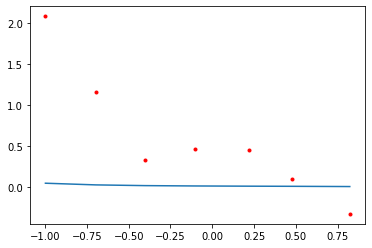

In [58]:
plt.plot(XX,YY,'r.')
plt.plot(XX,H_1)
plt.show()

In [38]:
#training loop
los=[]
reg=1
for i in range(100):
    H_2=hypothesis(X,theta_2,baise_2)
    l=loss(m,Y,H_2,reg,theta_2)
    los.append(l)
    vg=gradient_baise(m,Y,H_2)
    v_theta=gradient_theta(m,X,Y,H_2,reg)
    baise_2=baise_2-lr*vg
    theta_2=((theta_2*(1-(lr*(reg/m))))-lr*v_theta)
    #print(f'step={i},loss={l}')

NameError: name 'theta' is not defined

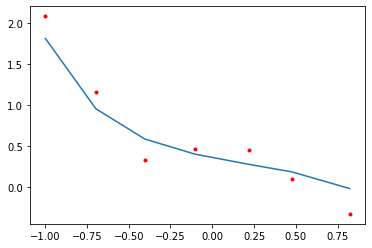

In [333]:
plt.plot(XX,YY,'r.')
plt.plot(XX,H)
plt.show()

In [210]:
#training loop
los3=[]
reg3=10
for i in range(100):
    H=hypothesis(X,theta_3,baise_3)
    l=loss(m,Y,H,reg3)
    los3.append(l)
    vg=gradient_baise(m,Y,H)
    v_theta=gradient_theta(m,X,Y,H)
    baise_3=baise_3-lr*vg
    theta_3=((theta_3*(1-(lr*(reg/m))))-lr*v_theta)
    #print(f'step={i},loss={l}')

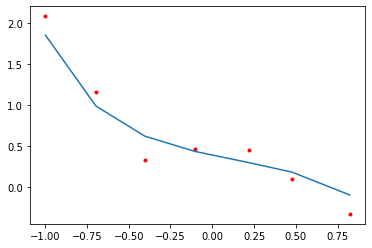

In [211]:
plt.plot(XX,YY,'r.')
plt.plot(XX,H)
plt.show()